In [2]:
import pandas as pd 
import sys 
import os 
import importlib 
import talib as ta
import matplotlib.pyplot as plt
path = 'C:/Users/mulle/Documents/iCloudDrive/Documents/19. GITHUB/Crypto/data'

os.chdir(path)

# Import the module
sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices
import camel
import sentiment_analyzer
importlib.reload(pipeline_crypto_prices)
importlib.reload(camel)
importlib.reload(sentiment_analyzer)

[scatterd] >WARNING> From C:\Users\mulle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



<module 'sentiment_analyzer' from 'P:\\6. DSMA/99. Thesis/Github/thesis/scripts\\sentiment_analyzer.py'>

In [29]:
btc = get_prices('SOL-USD', start_date='2018-01-01')
snp = get_prices('SNP', start_date='2018-01-01')
btc_a = get_prices(start_date='2018-01-01')

Data for SOL-USD from 2018-01-01 to 2024-07-11 has been downloaded successfully
Data for SNP from 2018-01-01 to 2024-07-11 has been downloaded successfully
Data for BTC-USD from 2018-01-01 to 2024-07-11 has been downloaded successfully


### Making Technical Indicators and Other 

In [33]:
btc_ta = btc.drop('Adj Close', axis=1).copy()
snp_ta = snp.drop('Adj Close', axis=1).copy()
btc_a_ta = btc_a.drop('Adj Close', axis=1).copy()
# Overlay
btc_ta['bb_upper'], btc_ta['bb_middle'], btc_ta['bb_lower'] = ta.BBANDS(btc_ta.Close, 20, 2)
btc_ta['SAR'] = ta.SAR(btc_ta.High, btc_ta.Low, acceleration=0.02, maximum=0.2)
btc_ta['t3'] = ta.T3(btc_ta.Close, 5, 0.7)
btc_ta['200MA'] = ta.MA(btc_ta.Close, 200)

# Momentum
btc_ta['Stochastic'] =  ta.STOCH(btc_ta.High, btc_ta.Low, btc_ta.Close, 14, 14, 0, 3, 0.5)[1]
btc_ta['RSI'] = ta.RSI(btc_ta.Close, 14)
btc_ta['CCI'] = ta.CCI(btc_ta.High, btc_ta.Low, btc_ta.Close, 14)
btc_ta['MACD'], btc_ta['MACD_Signal'], btc_ta['MACD_Hist'] = ta.MACD(btc_ta.Close, 12, 26, 9)
btc_ta['ROC'] = ta.ROC(btc_ta.Close, 12)

# Volume
btc_ta['OBV'] = ta.OBV(btc_ta.Close, btc_ta.Volume)
btc_ta['CMF'] = ta.ADOSC(btc_ta.High, btc_ta.Low, btc_ta.Close, btc_ta.Volume, 20)

### SNP Chart
snp_ta['MA'] = ta.MA(snp_ta.Close, 200)
snp_ta['21MA'] = ta.MA(snp_ta.Close, 21)

### BTC _ A
btc_a_ta['MA'] = ta.MA(btc_a_ta.Close, 200)
btc_a_ta['21MA'] = ta.MA(btc_a_ta.Close, 21)

btc_ta.tail(5)

,Date,Open,High,Low,Close,Volume,Returns,bb_upper,bb_middle,bb_lower,...,200MA,Stochastic,RSI,CCI,MACD,MACD_Signal,MACD_Hist,ROC,OBV,CMF
1548,2024-07-06,134.363297,144.008469,132.613297,143.241180,2078535871,0.066026,152.035160,138.701113,125.367067,...,137.117638,49.889357,49.698111,5.663660,-3.117082,-3.798616,0.681534,8.317960,8.991343e+10,2.351132e+08
1549,2024-07-07,143.187057,143.187057,131.774094,131.774094,1842515124,-0.080054,151.605089,138.123104,124.641120,...,137.365552,52.248942,43.334995,-52.906085,-3.570609,-3.753015,0.182406,-3.504055,8.807091e+10,2.351569e+08
1550,2024-07-08,131.797028,141.634109,128.562927,139.463699,3692404575,0.058354,151.712134,138.221090,124.730045,...,137.593597,54.833923,48.130938,-52.291441,-3.271830,-3.656778,0.384948,2.089577,9.176332e+10,1.759416e+07
1551,2024-07-09,139.537354,143.929382,136.740936,141.348450,2418798702,0.013514,152.008811,138.508032,125.007253,...,137.810321,56.800869,49.264398,-0.016350,-2.850107,-3.495444,0.645336,-5.419885,9.418212e+10,-2.028035e+08
1552,2024-07-10,141.374146,145.853714,138.856049,141.974792,1952272010,0.004431,152.307783,138.933123,125.558463,...,137.982223,58.565175,49.658102,18.505831,-2.437253,-3.283806,0.846552,1.625867,9.613439e+10,-3.440812e+08


In [127]:
# Make dataframe for all chart recognition 

charts = pd.DataFrame()
charts['Date'] = btc.Date
charts['CDL2CROWS'] = ta.CDL2CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3BLACKCROWS'] = ta.CDL3BLACKCROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3INSIDE'] = ta.CDL3INSIDE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3LINESTRIKE'] = ta.CDL3LINESTRIKE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3STARSINSOUTH'] = ta.CDL3STARSINSOUTH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDL3WHITESOLDIERS'] = ta.CDL3WHITESOLDIERS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLABANDONEDBABY'] = ta.CDLABANDONEDBABY(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLADVANCEBLOCK'] = ta.CDLADVANCEBLOCK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLBELTHOLD'] = ta.CDLBELTHOLD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLBREAKAWAY'] = ta.CDLBREAKAWAY(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCLOSINGMARUBOZU'] = ta.CDLCLOSINGMARUBOZU(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCONCEALBABYSWALL'] = ta.CDLCONCEALBABYSWALL(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLCOUNTERATTACK'] = ta.CDLCOUNTERATTACK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDARKCLOUDCOVER'] = ta.CDLDARKCLOUDCOVER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDOJI'] = ta.CDLDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDOJISTAR'] = ta.CDLDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLDRAGONFLYDOJI'] = ta.CDLDRAGONFLYDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLENGULFING'] = ta.CDLENGULFING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLEVENINGDOJISTAR'] = ta.CDLEVENINGDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLEVENINGSTAR'] = ta.CDLEVENINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLGAPSIDESIDEWHITE'] = ta.CDLGAPSIDESIDEWHITE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLGRAVESTONEDOJI'] = ta.CDLGRAVESTONEDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHAMMER'] = ta.CDLHAMMER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHANGINGMAN'] = ta.CDLHANGINGMAN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHARAMI'] = ta.CDLHARAMI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHARAMICROSS'] = ta.CDLHARAMICROSS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIGHWAVE'] = ta.CDLHIGHWAVE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIKKAKE'] = ta.CDLHIKKAKE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHIKKAKEMOD'] = ta.CDLHIKKAKEMOD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLHOMINGPIGEON'] = ta.CDLHOMINGPIGEON(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLIDENTICAL3CROWS'] = ta.CDLIDENTICAL3CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLINNECK'] = ta.CDLINNECK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLINVERTEDHAMMER'] = ta.CDLINVERTEDHAMMER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLKICKING'] = ta.CDLKICKING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLKICKINGBYLENGTH'] = ta.CDLKICKINGBYLENGTH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLADDERBOTTOM'] = ta.CDLLADDERBOTTOM(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLONGLEGGEDDOJI'] = ta.CDLLONGLEGGEDDOJI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLLONGLINE'] = ta.CDLLONGLINE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMARUBOZU'] = ta.CDLMARUBOZU(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMATCHINGLOW'] = ta.CDLMATCHINGLOW(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMATHOLD'] = ta.CDLMATHOLD(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMORNINGDOJISTAR'] = ta.CDLMORNINGDOJISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLMORNINGSTAR'] = ta.CDLMORNINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLONNECK'] = ta.CDLONNECK(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLPIERCING'] = ta.CDLPIERCING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLRICKSHAWMAN'] = ta.CDLRICKSHAWMAN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLRISEFALL3METHODS'] = ta.CDLRISEFALL3METHODS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSEPARATINGLINES'] = ta.CDLSEPARATINGLINES(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSHOOTINGSTAR'] = ta.CDLSHOOTINGSTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSHORTLINE'] = ta.CDLSHORTLINE(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSPINNINGTOP'] = ta.CDLSPINNINGTOP(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSTALLEDPATTERN'] = ta.CDLSTALLEDPATTERN(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLSTICKSANDWICH'] = ta.CDLSTICKSANDWICH(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTAKURI'] = ta.CDLTAKURI(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTASUKIGAP'] = ta.CDLTASUKIGAP(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTHRUSTING'] = ta.CDLTHRUSTING(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLTRISTAR'] = ta.CDLTRISTAR(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLUNIQUE3RIVER'] = ta.CDLUNIQUE3RIVER(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLUPSIDEGAP2CROWS'] = ta.CDLUPSIDEGAP2CROWS(btc.Close, btc.Open, btc.High, btc.Low)
charts['CDLXSIDEGAP3METHODS'] = ta.CDLXSIDEGAP3METHODS(btc.Close, btc.Open, btc.High, btc.Low)

# Create a more compact representation of the dataframe
charts['Non_Zero_Columns'] = charts.apply(
    lambda row: [col for col in charts.columns if row[col] != 0 and col != 'Date'], axis=1
)

# Filter to only include rows with non-zero columns
charts = charts[charts['Non_Zero_Columns'].apply(len) > 0]

# Keep only the 'Date' and 'Non_Zero_Columns' columns
charts = charts[['Date', 'Non_Zero_Columns']]

charts

,Date,Non_Zero_Columns
10,2018-01-10,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLMARUBOZU]"
11,2018-01-11,[CDLINVERTEDHAMMER]
14,2018-01-14,[CDLINVERTEDHAMMER]
16,2018-01-16,[CDLCLOSINGMARUBOZU]
17,2018-01-17,[CDLCLOSINGMARUBOZU]
...,...,...
2378,2024-07-05,[CDLCLOSINGMARUBOZU]
2379,2024-07-06,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLLONGLINE,..."
2380,2024-07-07,[CDLINVERTEDHAMMER]
2381,2024-07-08,"[CDLBELTHOLD, CDLCLOSINGMARUBOZU, CDLMARUBOZU]"


### Price Chart View

In [17]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FuncFormatter

# Define the formatter function
def dollar_formatter(x, pos):
    return f'${x:,.0f}'

# Apply the formatter to the y-axis
formatter = FuncFormatter(dollar_formatter)


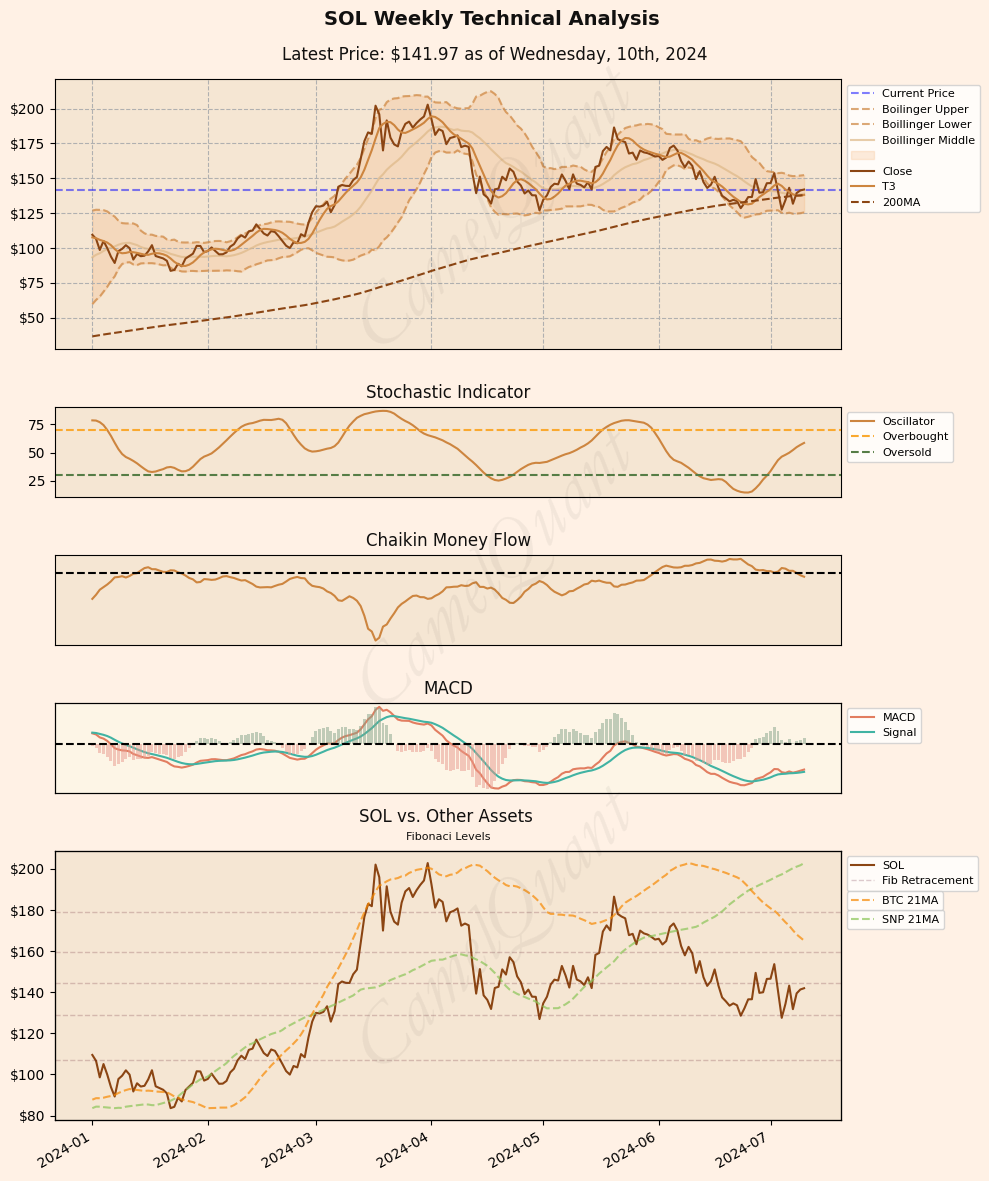

In [123]:
# Date range selection
btc_f = btc_ta[btc_ta.Date >= '2024-01-01'] #& (btc_ta.Date <= '2022-07-11')]
snp_f = snp_ta[snp_ta.Date >= '2024-01-01']
btc_a_f = btc_a_ta[btc_a_ta.Date >= '2024-01-01']

# Title
latest_price = btc_f.Close.iloc[-1]
latest_date = btc_f.Date.iloc[-1]
# Function to add ordinal suffix to the day
def ordinal_suffix(day):
    if 11 <= day <= 13:
        return f'{day}th'
    else:
        suffixes = {1: 'st', 2: 'nd', 3: 'rd'}
        return f'{day}{suffixes.get(day % 10, "th")}'

# Format the latest_date
latest_date_formatted = pd.to_datetime(latest_date)
formatted_date = latest_date_formatted.strftime(f'%A, {ordinal_suffix(latest_date_formatted.day)}, %Y')


main_title = 'SOL Weekly Technical Analysis \n \n '
subtitle = f'Latest Price: ${latest_price:,.2f} as of {formatted_date}'

fig, ax = plt.subplots(5, 1, figsize=(10,12), gridspec_kw={'height_ratios': [3, 1, 1, 1,3]}, dpi=100, sharex=True)

fig.suptitle(main_title, fontsize=14, color='#11100f', weight='bold')
fig.text(0.5, 0.95, subtitle, fontsize=12, color='#11100f', ha='center', va='top')

fig.autofmt_xdate()

### MOD 1: Current Price / Boilinger Bands, Closing Prices, T3
ax[0].axhline(y=btc_f.Close.iloc[-1], color='blue', linestyle='--', alpha=0.5)

ax[0].plot(btc_f.Date, btc_f.bb_upper, color='#CD853F', linestyle='--', alpha=0.7, label='Upper BB')
ax[0].plot(btc_f.Date, btc_f.bb_lower, color='#CD853F', linestyle='--', alpha=0.7, label='Lower BB')
ax[0].plot(btc_f.Date, btc_f.bb_middle, color='#DEB887', linestyle='-', alpha=0.7, label='Middle BB')
ax[0].fill_between(btc_f.Date, btc_f.bb_upper, btc_f.bb_lower, color='#F4A460', alpha=0.2)

ax[0].plot(btc_f.Date, btc_f.Close, color='#8B4513')
ax[0].plot(btc_f.Date, btc_f.t3, color='#CD853F')
ax[0].plot(btc_f.Date, btc_f['200MA'], color='#8B4513', linestyle='--')
ax[0].yaxis.set_major_formatter(formatter)

ax[0].legend(['Current Price','Boilinger Upper', 'Boillinger Lower', 'Boillinger Middle','', 'Close', 'T3', '200MA'], fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
ax[0].grid(True, linestyle='--')
ax[0].set_facecolor('#F5E6D3')
ax[0].tick_params(axis='x', which='both', length=0)

### MOD 2: Stochastic Indicator
ax[1].plot(btc_f.Date, btc_f.Stochastic, color = '#CD853F')
ax[1].axhline(y=70, color='#FAA92F', linestyle='--')
ax[1].axhline(y=30, color='#567D46', linestyle='--')
ax[1].set_title('Stochastic Indicator', color='#11100f')
ax[1].set_facecolor('#F5E6D3')
ax[1].legend(['Oscillator','Overbought','Oversold'],fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
ax[1].tick_params(axis='x', which='both', length=0)

### MOD 3: Chaikin Money Flow
ax[2].plot(btc_f.Date, btc_f.CMF, color = '#CD853F')
ax[2].set_title('Chaikin Money Flow', color='#11100f')
ax[2].axhline(y=0, color='black', linestyle='--')
ax[2].set_facecolor('#F5E6D3')
ax[2].set_yticklabels([])
ax[2].tick_params(axis='y', which='both', length=0)
ax[2].tick_params(axis='x', which='both', length=0)

### MOD 4: MACD
ax[3].plot(btc_f.Date, btc_f.MACD, color='#E27D60', label='MACD')
ax[3].plot(btc_f.Date, btc_f.MACD_Signal, color='#41B3A3', label='Signal')
colors = ['#85A389' if val >= 0 else '#E8998D' for val in btc_f.MACD_Hist]
ax3 = ax[3].twinx()
ax3.bar(btc_f.Date, btc_f.MACD_Hist, color=colors, label='Histogram', alpha=0.5)
ax[3].set_title('MACD', color='#11100f')
ax[3].set_facecolor('#FDF5E6')
ax[3].legend(fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
ax3.axhline(y=0, color='black', linestyle='--')
ax[3].set_yticklabels([])
ax[3].tick_params(axis='y', which='both', length=0)
ax[3].tick_params(axis='x', which='both', length=0)
ax3.set_yticklabels([])
ax3.tick_params(axis='y', which='both', length=0)
ax3.tick_params(axis='x', which='both', length=0)

## MOD 5: VS. Other Prices
ax[4].plot(btc_f.Date, btc_f.Close, color='#8B4513')
ax4 = ax[4].twinx()
ax41 = ax[4].twinx()
ax4.plot(snp_f.Date, snp_f['21MA'], color='#8ac557', linestyle='--', alpha=0.7)
ax41.plot(btc_a_f.Date, btc_a_f['21MA'], color='#f78800', linestyle='--', alpha=0.7)

ax[4].set_title('SOL vs. Other Assets \n', color='#11100f')
ax[4].text(0.5, 1.05, 'Fibonaci Levels', horizontalalignment='center', verticalalignment='center', transform=ax[4].transAxes, color='#11100f', fontsize=8)

ax4.set_yticklabels([])
ax4.tick_params(axis='y', which='both', length=0)
ax4.tick_params(axis='x', which='both', length=0)
ax41.set_yticklabels([])
ax41.tick_params(axis='y', which='both', length=0)
ax41.tick_params(axis='x', which='both', length=0)

ax[4].yaxis.set_major_formatter(formatter)
#for center in (sorted_centers):
    #ax[4].axhline(y=center, color='#520018', linestyle='--', label=f'Level {i+1}: {center:.2f}', linewidth=1, alpha=0.2)

for i, center in enumerate(levels):
    ax[4].axhline(y=center, color='#520018', linestyle='--', linewidth=1, alpha=0.2)

ax[4].legend(['SOL','Fib Retracement'],fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
ax4.legend(['SNP 21MA'],fontsize=8, loc='upper left', bbox_to_anchor=(1, 0.8))
ax41.legend(['BTC 21MA'],fontsize=8, loc='upper left', bbox_to_anchor=(1, 0.87))
ax[4].set_facecolor('#F5E6D3')

fig.text(0.5, 0.7, 'CamelQuant', ha='center',fontsize=60, color='#11100f', fontdict={'family': 'Garamond'}, rotation=45, alpha=0.05, style='italic', fontweight='bold')
fig.text(0.5, 0.4, 'CamelQuant', ha='center',fontsize=60, color='#11100f', fontdict={'family': 'Garamond'}, rotation=45, alpha=0.05, style='italic', fontweight='bold')
fig.text(0.5, 0.10, 'CamelQuant', ha='center',fontsize=60, color='#11100f', fontdict={'family': 'Garamond'}, rotation=45, alpha=0.05, style='italic', fontweight='bold')
fig.set_facecolor('#fff1e5')
plt.tight_layout()

### Backend: Have to make modular

###### K-Means

In [47]:
from sklearn.cluster import KMeans

# Extract the 'Price' column for clustering
prices = btc_f['Close'].values.reshape(-1, 1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(prices)

# Get cluster centers (these can be considered as potential support/resistance levels)
cluster_centers = kmeans.cluster_centers_.flatten()

# Sort the levels for better readability
sorted_centers = sorted(cluster_centers, reverse=True)

# Create a DataFrame for the support and resistance levels with sorted names
support_resistance_df = pd.DataFrame({
    'Level': sorted_centers,
    'Type': [f'Level {i+1}' for i in range(len(sorted_centers))]
})

In [54]:
import numpy as np
# Calculate the highest high and lowest low
high = np.max(btc_f.High)
low = np.min(btc_f.Low)

# Calculate the Fibonacci retracement levels
diff = high - low
level_23_6 = high - diff * 0.236
level_38_2 = high - diff * 0.382
level_50 = high - diff * 0.5
level_61_8 = high - diff * 0.618
level_78_6 = high - diff * 0.786

#make a list 
levels = [level_23_6, level_38_2, level_50, level_61_8, level_78_6]
levels

[178.867530096,
 159.79564295199998,
 144.38137799999998,
 128.967113048,
 107.02137989599997]

In [ ]:
ax[0].plot(btc_f.Date, btc_f.Close)
ax[0].plot(btc_f.Date, ta.KAMA(btc_f.Close, 10))
ax[0].plot(btc_f.Date, ta.EMA(btc_f.Close, 20))
ax[0].legend(['Close', 'KAMA','EMA (20)'])

ax[1].plot(btc_f.Date, btc_f.Volume)
ax[1].plot(btc_f.Date, ta.EMA(btc_f.Volume, 20)

plt.tight_layout()

In [ ]:
EMA(btc_f.Volume, 20)

plt.tight_layout()

In [53]:
ta.get_functions()

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',


In [151]:
?ta.CMO

Signature: ta.CMO(real, timeperiod=-2147483648)
Docstring:
CMO(real[, timeperiod=?])

Chande Momentum Oscillator (Momentum Indicators)

Inputs:
    real: (any ndarray)
Parameters:
    timeperiod: 14
Outputs:
    real
Type:      function